In [2]:
# Import seaborn & matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import setup and seaborn_helpers
from setup.setup import *

In [4]:
# Load cdl dataframe
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\2024.04.10 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,27287,2024-04-19,Friday,Vikul,Miami Heretics,4,Karachi,Hardpoint,21,25,...,0,L,MIA,Heretics,Toronto Ultra,TOR,250,463,-37,0
4108,27287,2024-04-19,Friday,CleanX,Toronto Ultra,4,Karachi,Hardpoint,25,20,...,1,W,TOR,Ultra,Miami Heretics,MIA,213,463,37,0
4109,27287,2024-04-19,Friday,Envoy,Toronto Ultra,4,Karachi,Hardpoint,17,25,...,1,W,TOR,Ultra,Miami Heretics,MIA,213,463,37,0
4110,27287,2024-04-19,Friday,Insight,Toronto Ultra,4,Karachi,Hardpoint,22,19,...,1,W,TOR,Ultra,Miami Heretics,MIA,213,463,37,0


In [5]:
# Filter maps
cdlDF = filter_maps(cdlDF)
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,27287,2024-04-19,Friday,Vikul,Miami Heretics,4,Karachi,Hardpoint,21,25,...,0,L,MIA,Heretics,Toronto Ultra,TOR,250,463,-37,0
3004,27287,2024-04-19,Friday,CleanX,Toronto Ultra,4,Karachi,Hardpoint,25,20,...,1,W,TOR,Ultra,Miami Heretics,MIA,213,463,37,0
3005,27287,2024-04-19,Friday,Envoy,Toronto Ultra,4,Karachi,Hardpoint,17,25,...,1,W,TOR,Ultra,Miami Heretics,MIA,213,463,37,0
3006,27287,2024-04-19,Friday,Insight,Toronto Ultra,4,Karachi,Hardpoint,22,19,...,1,W,TOR,Ultra,Miami Heretics,MIA,213,463,37,0


In [7]:
# Filter dataframe
queried_df = cdlDF[
    (cdlDF["player"] == "Attach") &
    (cdlDF["gamemode"] == "Hardpoint")
].copy()

queried_df

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
96,27197,2023-12-09,Saturday,Attach,Las Vegas Legion,4,Sub Base,Hardpoint,32,21,...,1,W,LV,Legion,Minnesota ROKKR,MIN,224,474,26,0
148,27200,2023-12-10,Sunday,Attach,Las Vegas Legion,4,Karachi,Hardpoint,17,17,...,0,L,LV,Legion,Carolina Royal Ravens,CAR,250,381,-119,0
648,27228,2024-01-20,Saturday,Attach,Las Vegas Legion,1,Sub Base,Hardpoint,21,30,...,0,L,LV,Legion,Toronto Ultra,TOR,250,467,-33,0
976,35645,2024-01-26,Friday,Attach,Las Vegas Legion,4,Karachi,Hardpoint,22,19,...,0,L,LV,Legion,Los Angeles Guerrillas,LAG,250,477,-23,0
1304,27240,2024-02-18,Sunday,Attach,Las Vegas Legion,1,Karachi,Hardpoint,20,15,...,1,W,LV,Legion,Los Angeles Guerrillas,LAG,192,442,58,0
1328,27240,2024-02-18,Sunday,Attach,Las Vegas Legion,4,Rio,Hardpoint,25,22,...,1,W,LV,Legion,Los Angeles Guerrillas,LAG,236,486,14,0
1456,27245,2024-02-23,Friday,Attach,Las Vegas Legion,4,Rio,Hardpoint,19,16,...,1,W,LV,Legion,Miami Heretics,MIA,135,385,115,0
1472,27246,2024-02-24,Saturday,Attach,Las Vegas Legion,1,Rio,Hardpoint,19,22,...,0,L,LV,Legion,Toronto Ultra,TOR,250,482,-18,0
1496,27246,2024-02-24,Saturday,Attach,Las Vegas Legion,4,Karachi,Hardpoint,20,23,...,0,L,LV,Legion,Toronto Ultra,TOR,250,497,-3,0
1684,27254,2024-03-02,Saturday,Attach,Las Vegas Legion,1,Karachi,Hardpoint,25,22,...,1,W,LV,Legion,Boston Breach,BOS,244,494,6,0


In [15]:
# Set seaborn theme
sns.set_theme(style = "darkgrid")

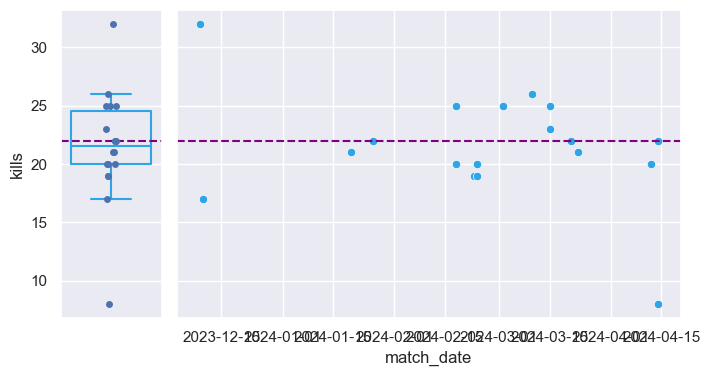

In [40]:
# Player Kills vs Time

# Create figure with gridspec
f, axs = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = dict(width_ratios=[0.4, 2], wspace = 0.05), sharey = True)

# Boxplot
sns.boxplot(queried_df, y =  "kills", fill = False, ax=axs[0], color = "#2fa4e7", showfliers = False)
sns.stripplot(queried_df, y = "kills", jitter = 0.05, ax=axs[0])
axs[0].axhline(y = 22, color = "purple", linestyle = '--')

# Scatterplot
sns.scatterplot(queried_df, x = "match_date", y = "kills", ax=axs[1], color = "#2fa4e7")
axs[1].axhline(y = 22, color = "purple", linestyle = '--')

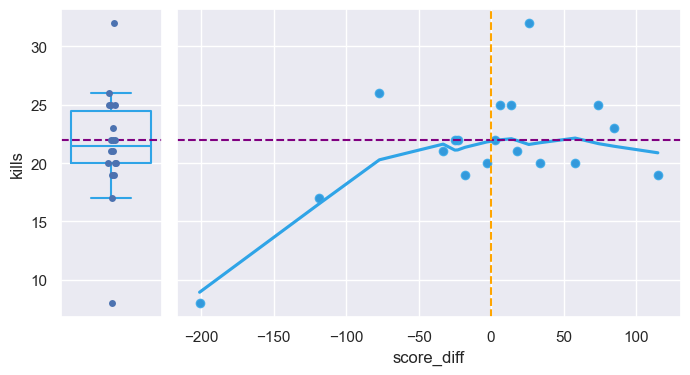

In [34]:
# Player Kills vs Score Diff

# Set style
# sns.set_style({})

# Create figure with gridspec
f, axs = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = dict(width_ratios=[0.4, 2], wspace = 0.05), sharey = True)

# Boxplot
sns.boxplot(queried_df, y =  "kills", fill = False, ax=axs[0], color = "#2fa4e7", showfliers = False)
sns.stripplot(queried_df, y = "kills", jitter = 0.05, ax=axs[0])
axs[0].axhline(y = 22, color = "purple", linestyle = '--')

# Scatterplot
sns.scatterplot(queried_df, x = "score_diff", y = "kills", ax=axs[1])
sns.regplot(queried_df, x = "score_diff", y = "kills", lowess = True, color = "#2fa4e7")
axs[1].axhline(y = 22, color = "purple", linestyle = '--')
axs[1].axvline(x = 0, color = "orange", linestyle = '--')